In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,15]
import seaborn as sns
sns.set(palette='bright')

In [2]:
cases = pd.read_csv('CasesCAMCAR.csv', index_col=0)
deaths = pd.read_csv('DeathsCAMCAR.csv', index_col=0)
recovered = pd.read_csv('InternationalRecovered.csv', index_col=0)

In [3]:
cases

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20           0       0          0          0            0         0   
3/1/20            0       0          0          0            0         0   
3/2/20            0       0          0          0            0         0   
3/3/20            0       0          0          0            0         0   
3/4/20            0       0          0          0            0         0   
...             ...     ...        ...        ...          ...       ...   
7/29/20       16800   63269      47605       3672        15841     40944   
7/30/20       17290   64191      48826       3672        16230     41426   
7/31/20       17820   65256      49789       3672        16632     42014   
8/1/20        18187   66383      50979       3672        17050     42685   
8/2/20        18975   67453      51306       3672        17448     43197   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
2/29/20                   0        0                    0     0  
3/1/20                    1        0                    0     0  
3/2/20                    1        0                    0     0  
3/3/20                    1        0                    0     0  
3/4/20                    1        0                    0     0  
...                     ...      ...                  ...   ...  
7/29/20               66182      856                  156  2588  
7/30/20               67915      864                  164  2597  
7/31/20               69649      878                  169  2608  
8/1/20                71415      883                  173  2633  
8/2/20                72243      894                  182  2646  

[156 rows x 10 columns]

In [4]:
deaths.head()

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20           0       0          0          0            0         0   
3/1/20            0       0          0          0            0         0   
3/2/20            0       0          0          0            0         0   
3/3/20            0       0          0          0            0         0   
3/4/20            0       0          0          0            0         0   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
2/29/20                   0        0                    0     0  
3/1/20                    0        0                    0     0  
3/2/20                    0        0                    0     0  
3/3/20                    0        0                    0     0  
3/4/20                    0        0                    0     0

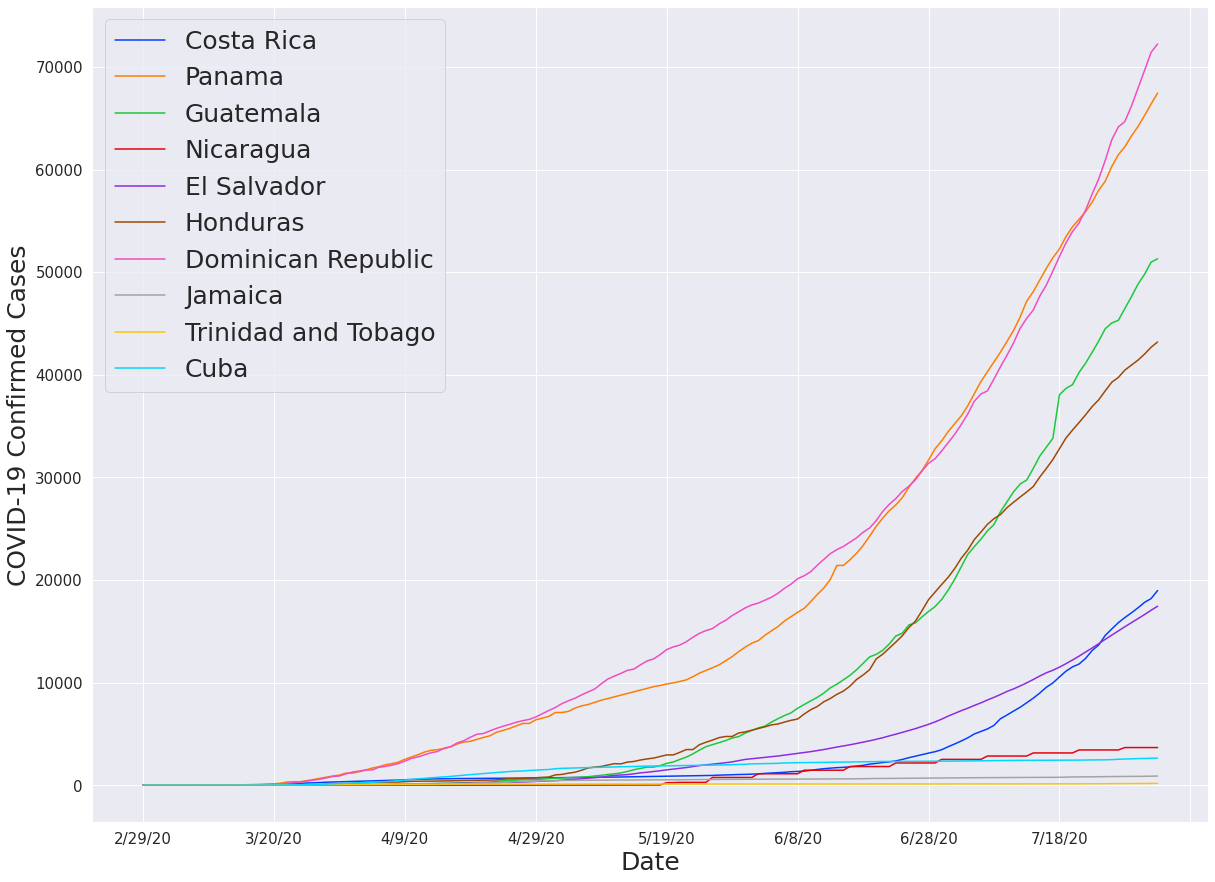

In [5]:
cases.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Confirmed Cases', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

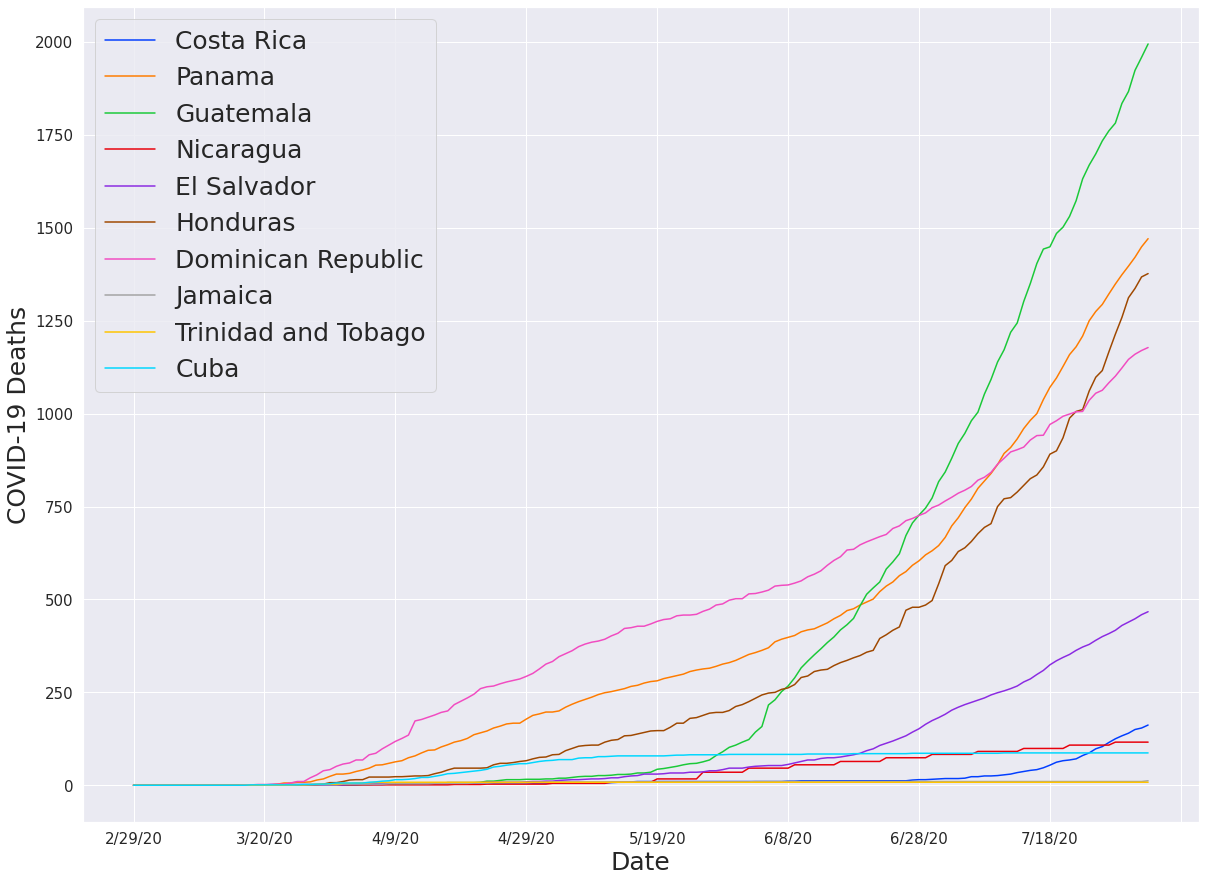

In [6]:
deaths.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Deaths', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [7]:
new_cases_per_day = cases.diff().dropna()
new_cases_per_day

Costa Rica  Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
3/1/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/2/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/3/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/4/20          0.0     0.0        0.0        0.0          0.0       0.0   
3/5/20          0.0     0.0        0.0        0.0          0.0       0.0   
...             ...     ...        ...        ...          ...       ...   
7/29/20       456.0  1046.0     1154.0        0.0        395.0     484.0   
7/30/20       490.0   922.0     1221.0        0.0        389.0     482.0   
7/31/20       530.0  1065.0      963.0        0.0        402.0     588.0   
8/1/20        367.0  1127.0     1190.0        0.0        418.0     671.0   
8/2/20        788.0  1070.0      327.0        0.0        398.0     512.0   

         Dominican Republic  Jamaica  Trinidad and Tobago  Cuba  
3/1/20                  1.0      0.0                  0.0   0.0  
3/2/20                  0.0      0.0                  0.0   0.0  
3/3/20                  0.0      0.0                  0.0   0.0  
3/4/20                  0.0      0.0                  0.0   0.0  
3/5/20                  0.0      0.0                  0.0   0.0  
...                     ...      ...                  ...   ...  
7/29/20              1492.0      1.0                  3.0  33.0  
7/30/20              1733.0      8.0                  8.0   9.0  
7/31/20              1734.0     14.0                  5.0  11.0  
8/1/20               1766.0      5.0                  4.0  25.0  
8/2/20                828.0     11.0                  9.0  13.0  

[155 rows x 10 columns]

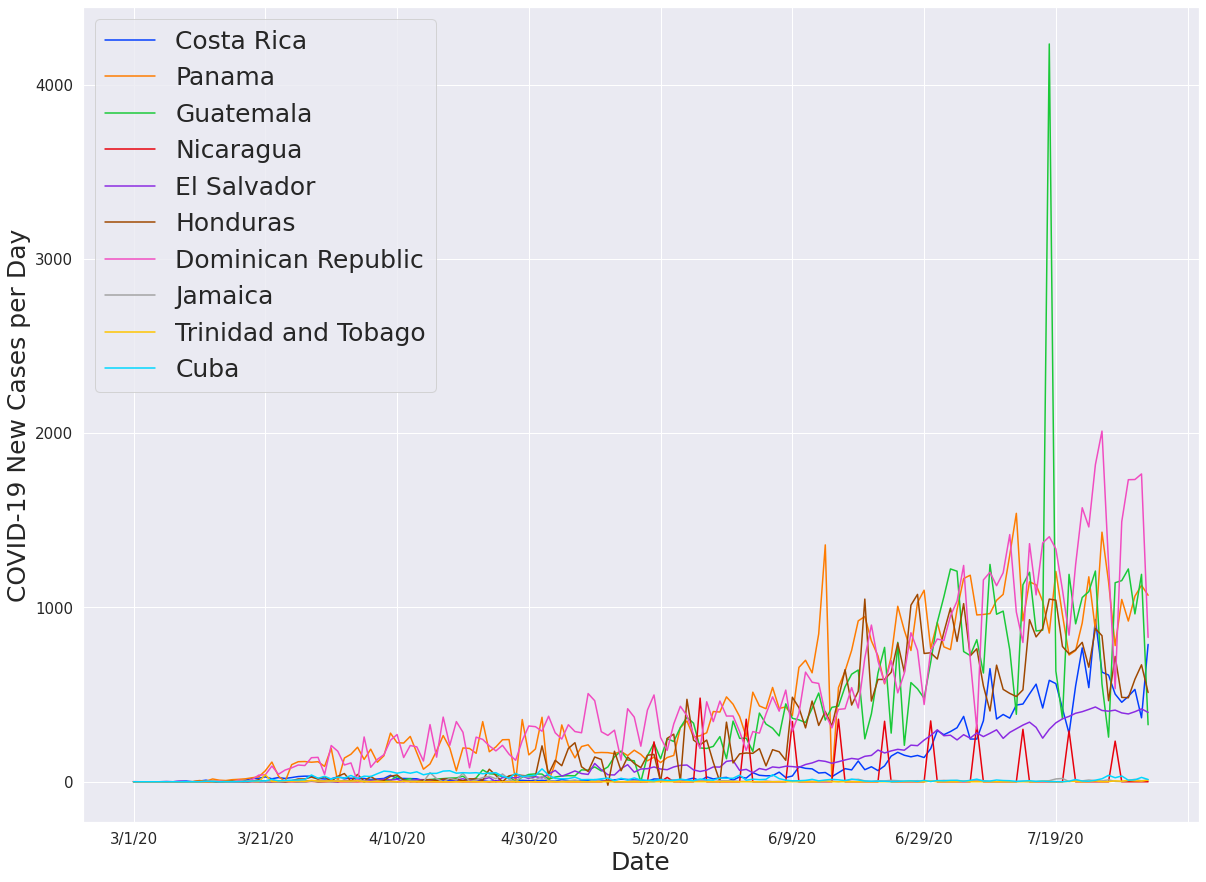

In [8]:
new_cases_per_day.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 New Cases per Day', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [9]:
def prep_for_pie_chart(data, quantile=0.0):
    latest = data.iloc[-1,:]
    latest = latest[latest != 0]
    if quantile != 0:
        quant = latest.quantile(quantile)
        smallest_countries = latest[latest <= quant]
        temp = pd.Series(smallest_countries.sum())
        temp.index = ['Others']
        totals = latest[latest > quant]
        name = totals.name
        totals = totals.append(temp)
        totals.rename(name)
    else:
        totals = latest
    return totals

In [10]:
def draw_pie_chart(data, title):
    name = data.name
    data.plot(kind='pie', autopct='%.2f%%', labels=['']*len(data), startangle=0)
    plt.ylabel(name, fontsize=15)
    plt.legend(fontsize=12, labels=data.index)
    plt.title(title, fontsize=25)

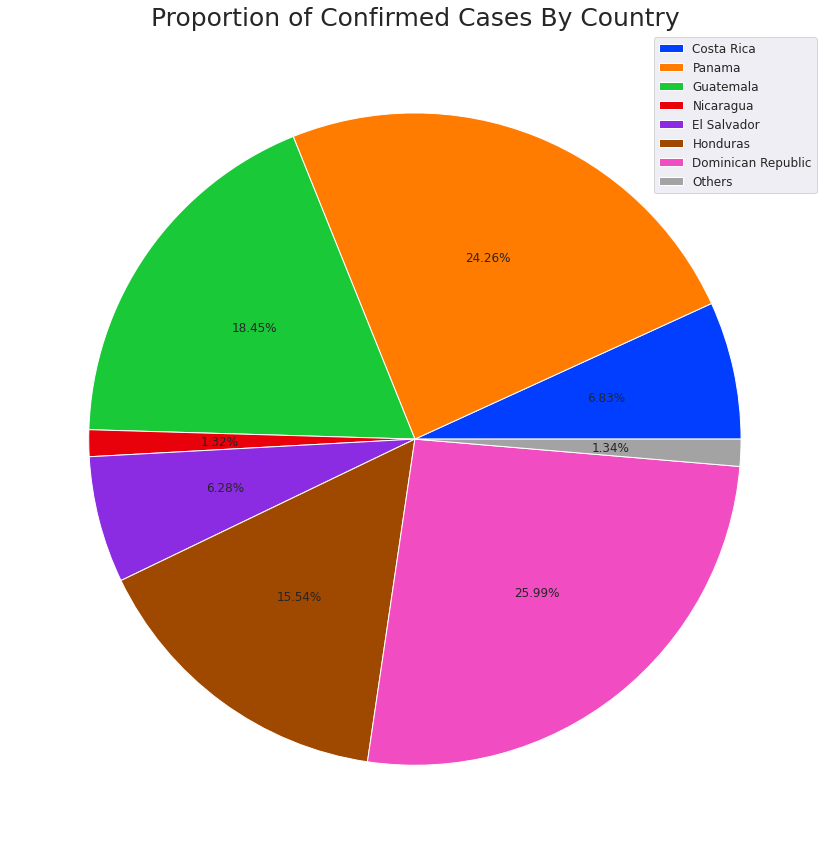

In [11]:

draw_pie_chart(prep_for_pie_chart(cases, 0.24), 'Proportion of Confirmed Cases By Country')
plt.show()

In [12]:
deaths_totals = prep_for_pie_chart(deaths)

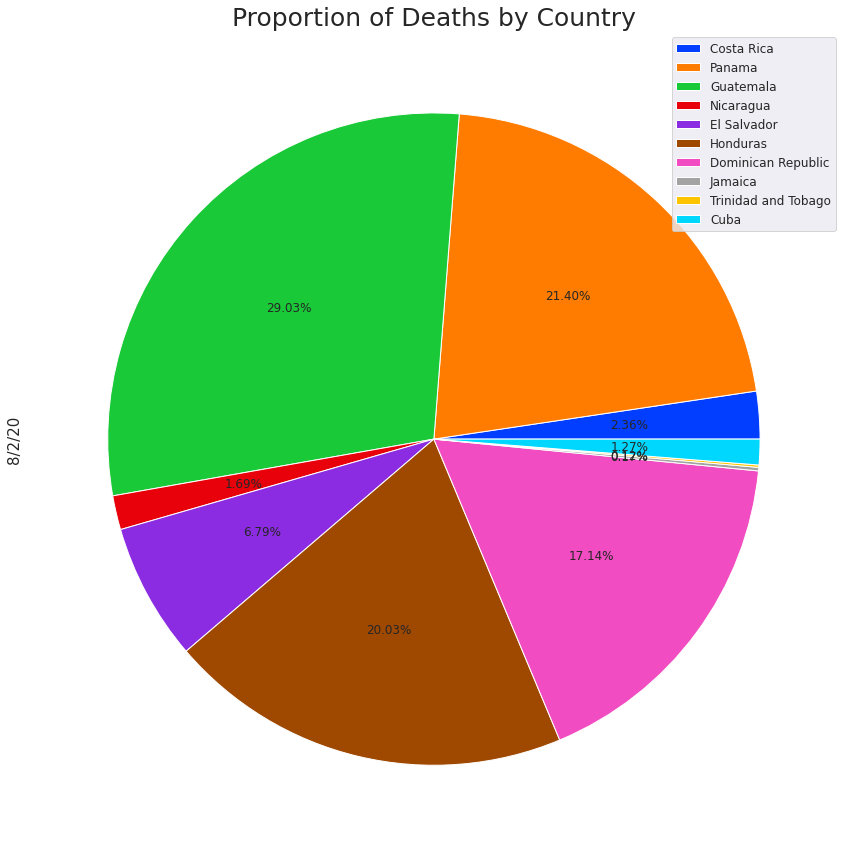

In [13]:
draw_pie_chart(deaths_totals, 'Proportion of Deaths by Country')

In [14]:
growth_df = pd.read_csv('GrowthFactorCAMCAR.csv', index_col=0)
growth_df

Costa Rica    Panama  Guatemala  Nicaragua  El Salvador  Honduras  \
2/29/20    0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/1/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/2/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/3/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
3/4/20     0.000000  0.000000   0.000000        0.0     0.000000  0.000000   
...             ...       ...        ...        ...          ...       ...   
7/29/20    1.027900  1.016811   1.024843        1.0     1.025573  1.011962   
7/30/20    1.029167  1.014573   1.025649        1.0     1.024557  1.011772   
7/31/20    1.030654  1.016591   1.019723        1.0     1.024769  1.014194   
8/1/20     1.020595  1.017270   1.023901        1.0     1.025132  1.015971   
8/2/20     1.043328  1.016119   1.006414        1.0     1.023343  1.011995   

         Dominican Republic   Jamaica  Trinidad and Tobago      Cuba  
2/29/20            0.000000  0.000000             0.000000  0.000000  
3/1/20             0.000000  0.000000             0.000000  0.000000  
3/2/20             1.000000  0.000000             0.000000  0.000000  
3/3/20             1.000000  0.000000             0.000000  0.000000  
3/4/20             1.000000  0.000000             0.000000  0.000000  
...                     ...       ...                  ...       ...  
7/29/20            1.023064  1.001170             1.019608  1.012916  
7/30/20            1.026185  1.009346             1.051282  1.003478  
7/31/20            1.025532  1.016204             1.030488  1.004236  
8/1/20             1.025356  1.005695             1.023669  1.009586  
8/2/20             1.011594  1.012458             1.052023  1.004937  

[156 rows x 10 columns]

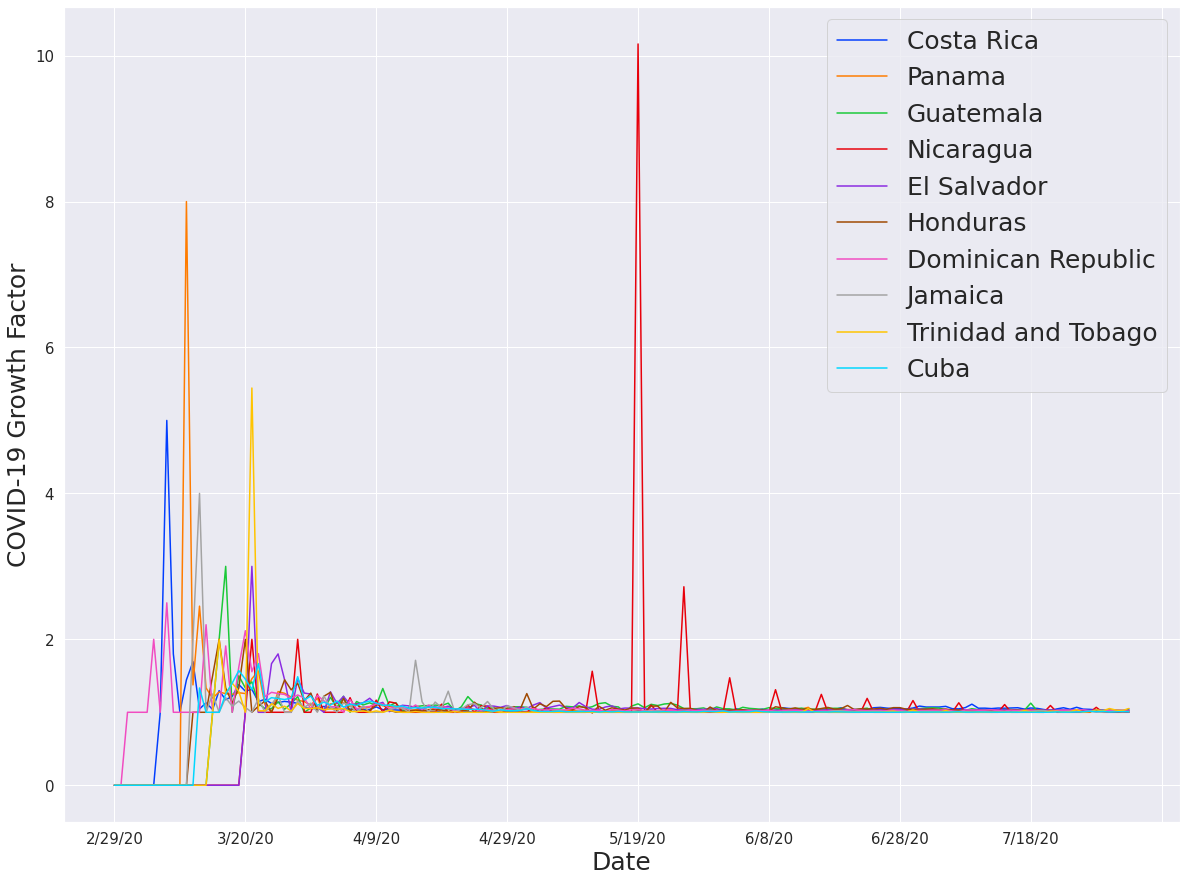

In [15]:
growth_df.plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [16]:
growth_df.describe()

Costa Rica      Panama   Guatemala   Nicaragua  El Salvador  \
count  156.000000  156.000000  156.000000  156.000000   156.000000   
mean     1.038949    1.040324    0.984926    0.979495     0.945549   
std      0.401149    0.640225    0.371089    0.841766     0.407308   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      1.011662    1.018567    1.025538    1.000000     1.027311   
50%      1.032753    1.027693    1.048734    1.000000     1.033735   
75%      1.056955    1.046128    1.078816    1.000000     1.059530   
max      5.000000    8.000000    3.000000   10.160000     3.000000   

         Honduras  Dominican Republic     Jamaica  Trinidad and Tobago  \
count  156.000000          156.000000  156.000000           156.000000   
mean     0.995444            1.076170    0.981747             0.953380   
std      0.317746            0.252272    0.385559             0.480534   
min      0.000000            0.000000    0.000000             0.000000   
25%      1.017765            1.018682    1.001219             1.000000   
50%      1.033664            1.027659    1.006977             1.000000   
75%      1.061469            1.046151    1.021176             1.008869   
max      2.000000            2.500000    4.000000             5.444444   

             Cuba  
count  156.000000  
mean     0.965485  
std      0.310305  
min      0.000000  
25%      1.002145  
50%      1.006306  
75%      1.041798  
max      1.666667

In [17]:
growth_df.mean()

Costa Rica             1.038949
Panama                 1.040324
Guatemala              0.984926
Nicaragua              0.979495
El Salvador            0.945549
Honduras               0.995444
Dominican Republic     1.076170
Jamaica                0.981747
Trinidad and Tobago    0.953380
Cuba                   0.965485
dtype: float64

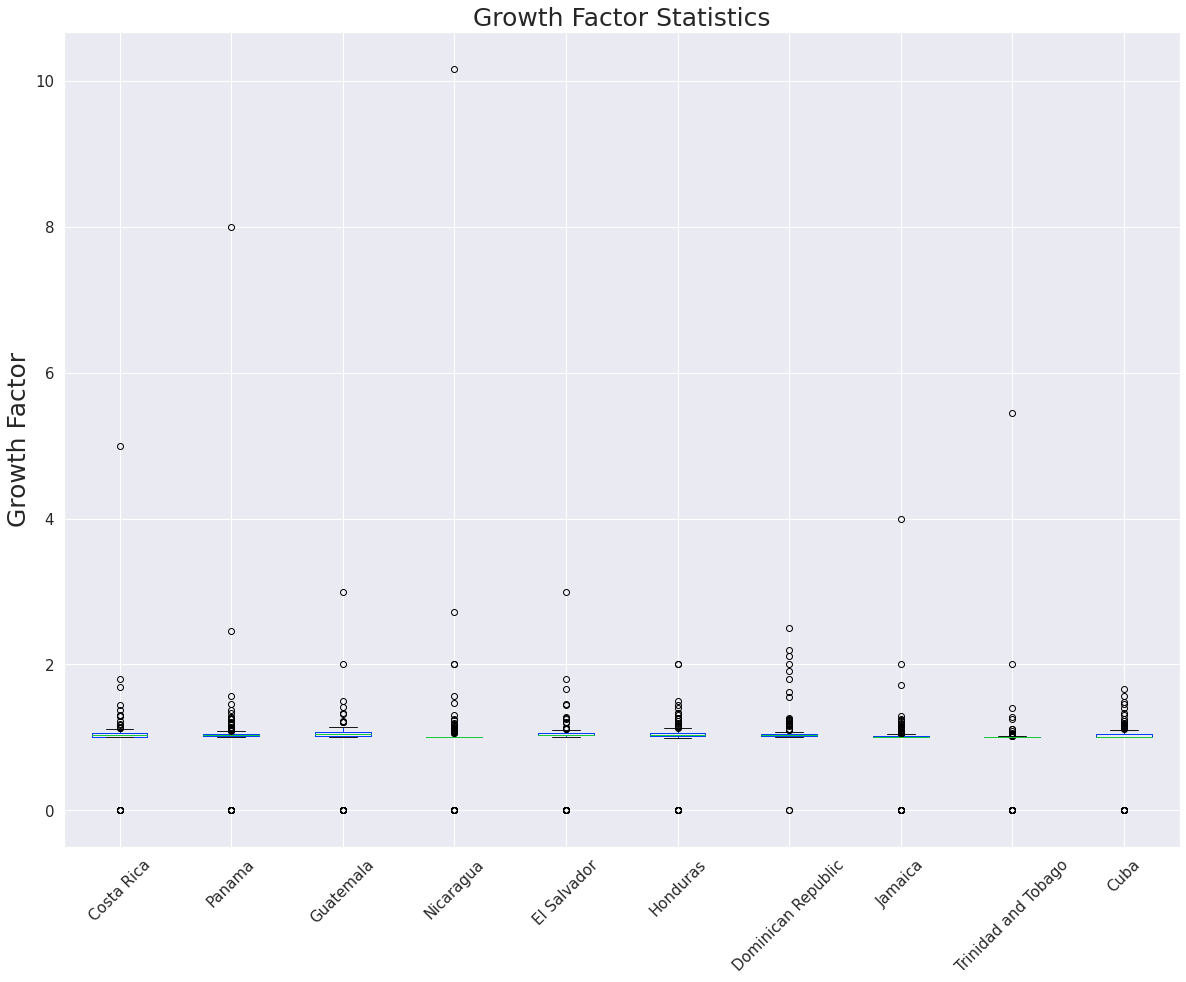

In [18]:
growth_df.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

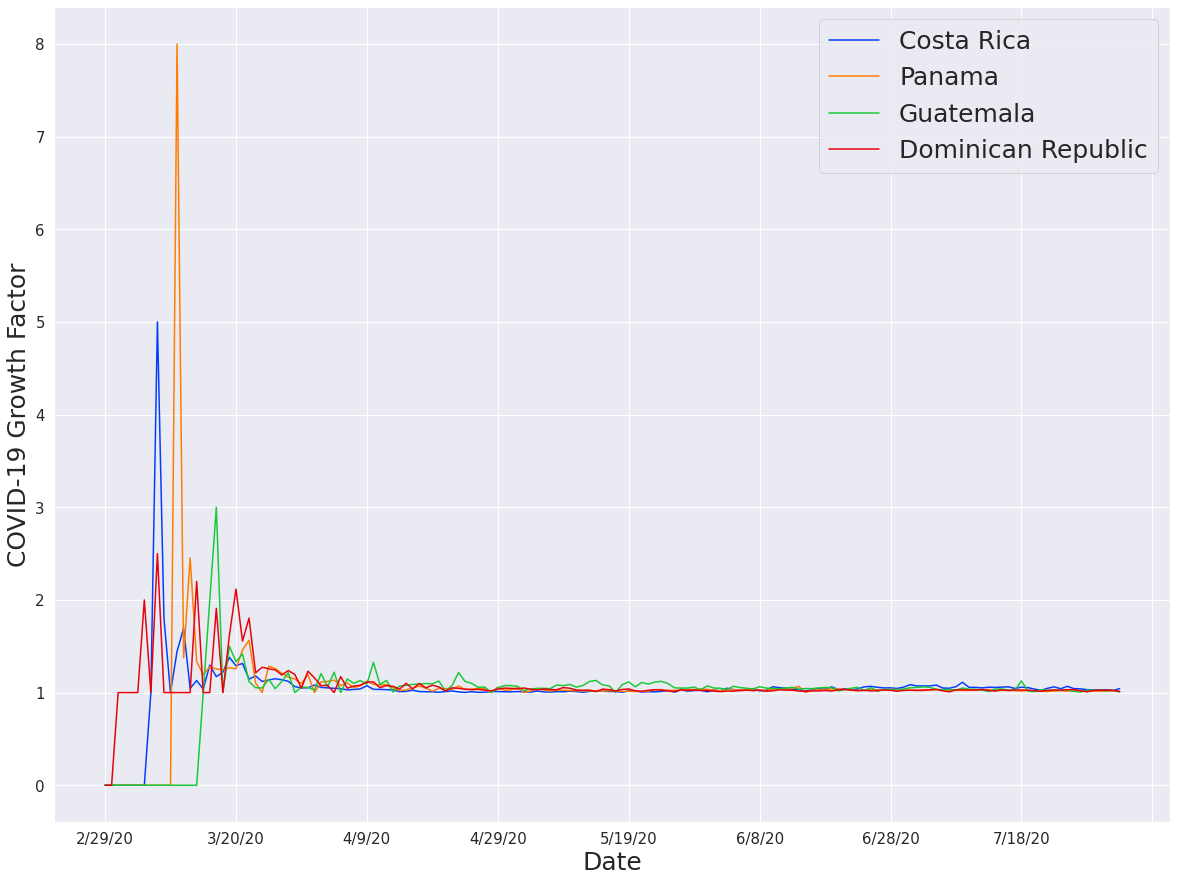

In [19]:
growth_df[['Costa Rica', 'Panama', 'Guatemala', 'Dominican Republic']].plot()
plt.legend(fontsize=25)
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [20]:
growth_no_null = growth_df[growth_df > 0]
growth_no_null.describe()

Costa Rica      Panama   Guatemala   Nicaragua  El Salvador  \
count  149.000000  145.000000  141.000000  136.000000   136.000000   
mean     1.087758    1.119245    1.089705    1.123538     1.084600   
std      0.339234    0.593510    0.193564    0.806539     0.196330   
min      1.000000    1.000000    1.000000    1.000000     1.000000   
25%      1.015385    1.020547    1.030576    1.000000     1.030212   
50%      1.035250    1.029347    1.050943    1.000000     1.037104   
75%      1.058122    1.051330    1.087302    1.000000     1.069165   
max      5.000000    8.000000    3.000000   10.160000     3.000000   

         Honduras  Dominican Republic     Jamaica  Trinidad and Tobago  \
count  144.000000          154.000000  144.000000           141.000000   
mean     1.078398            1.090146    1.063559             1.054803   
std      0.139112            0.221669    0.271127             0.384588   
min      0.990476            1.000000    1.000000             1.000000   
25%      1.021577            1.019219    1.002653             1.000000   
50%      1.037591            1.027773    1.007741             1.000000   
75%      1.063729            1.046754    1.024160             1.014388   
max      2.000000            2.500000    4.000000             5.444444   

             Cuba  
count  143.000000  
mean     1.053257  
std      0.109580  
min      1.000000  
25%      1.003140  
50%      1.006940  
75%      1.048921  
max      1.666667

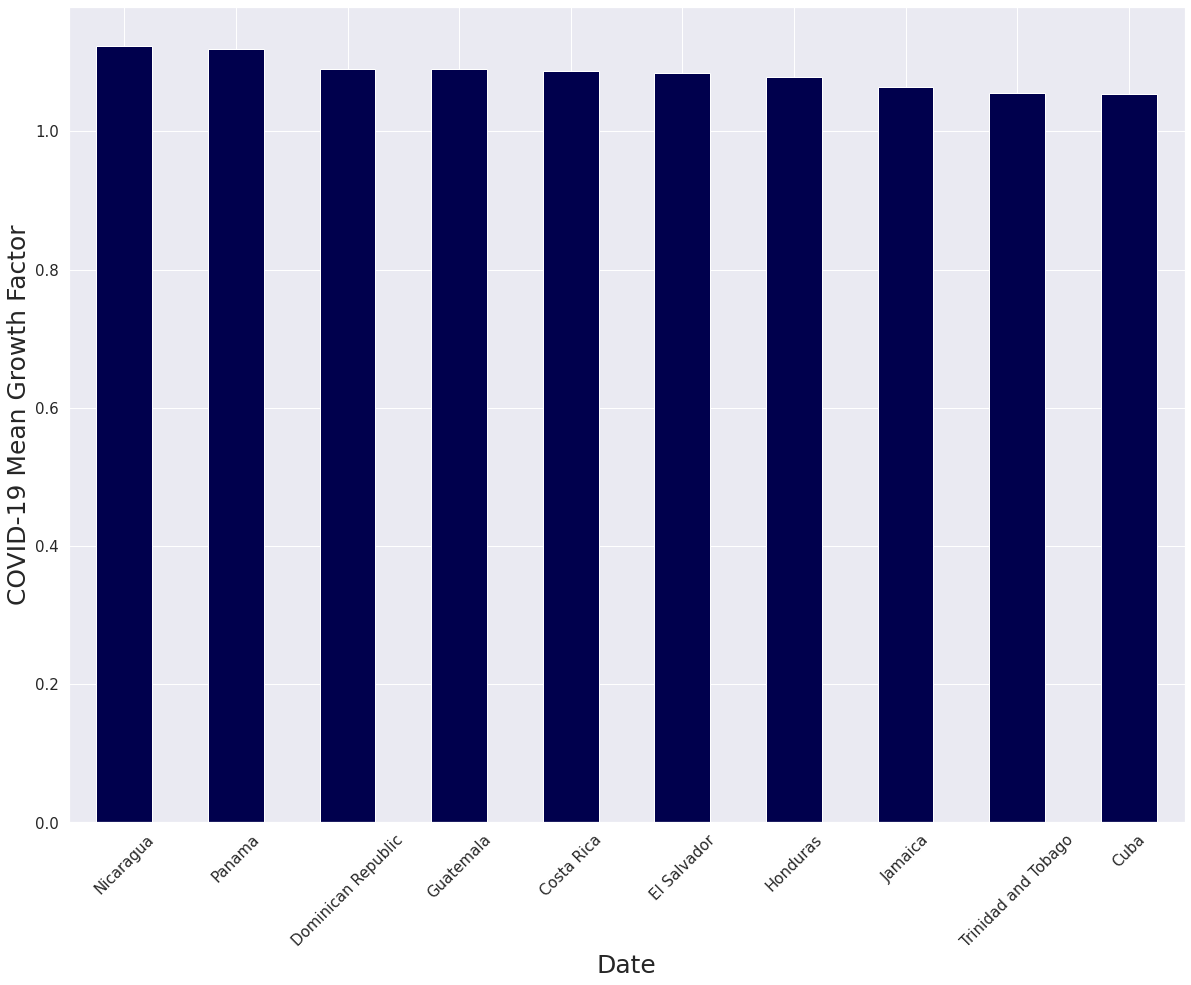

In [21]:
growth_no_null.mean().sort_values(ascending=False).plot(kind='bar', rot=45, cmap=plt.get_cmap('seismic'))
plt.xlabel('Date', fontsize=25)
plt.ylabel('COVID-19 Mean Growth Factor', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

/home/andres/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


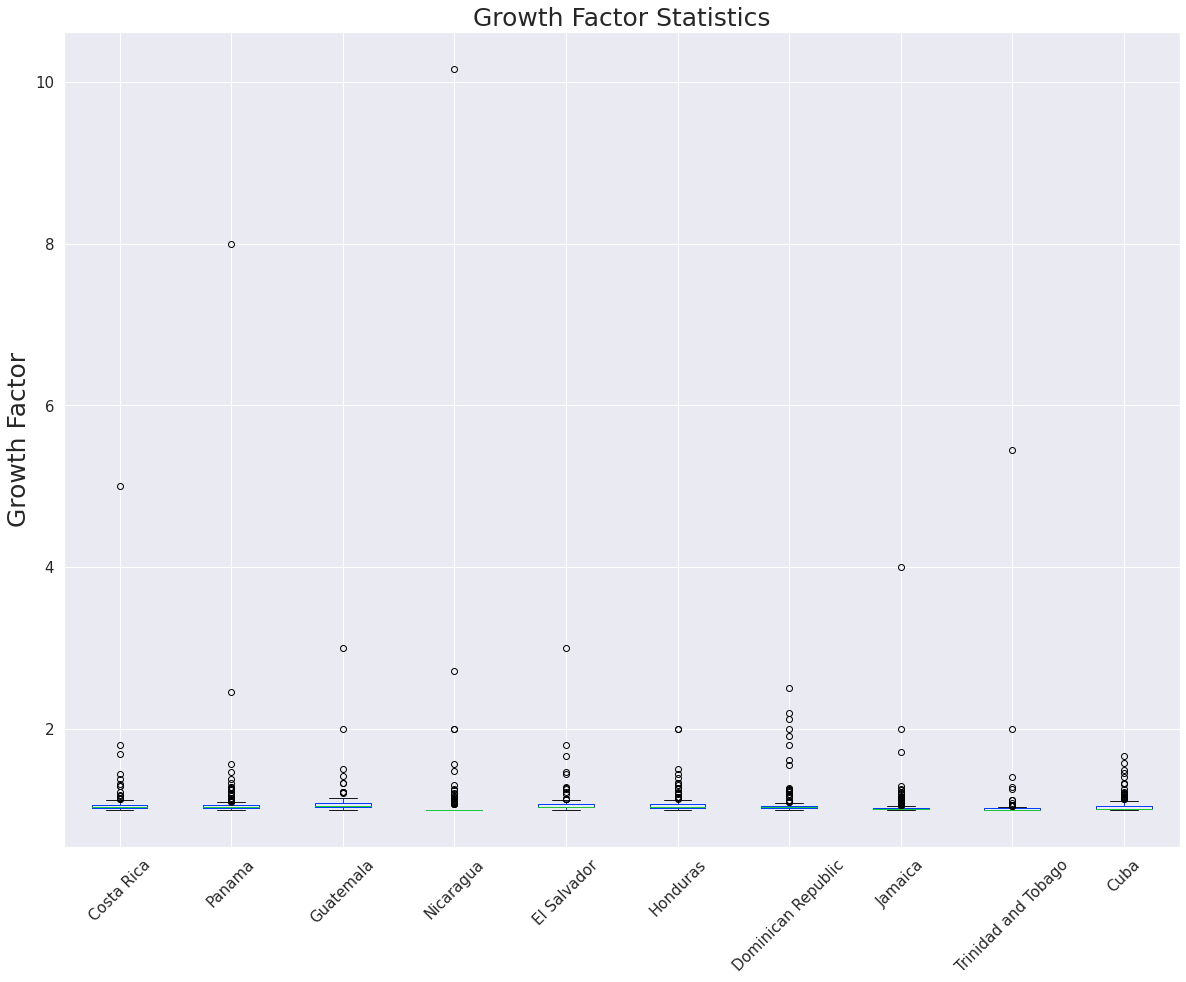

In [22]:
growth_no_null.plot(kind='box', fontsize=15, rot=45)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()

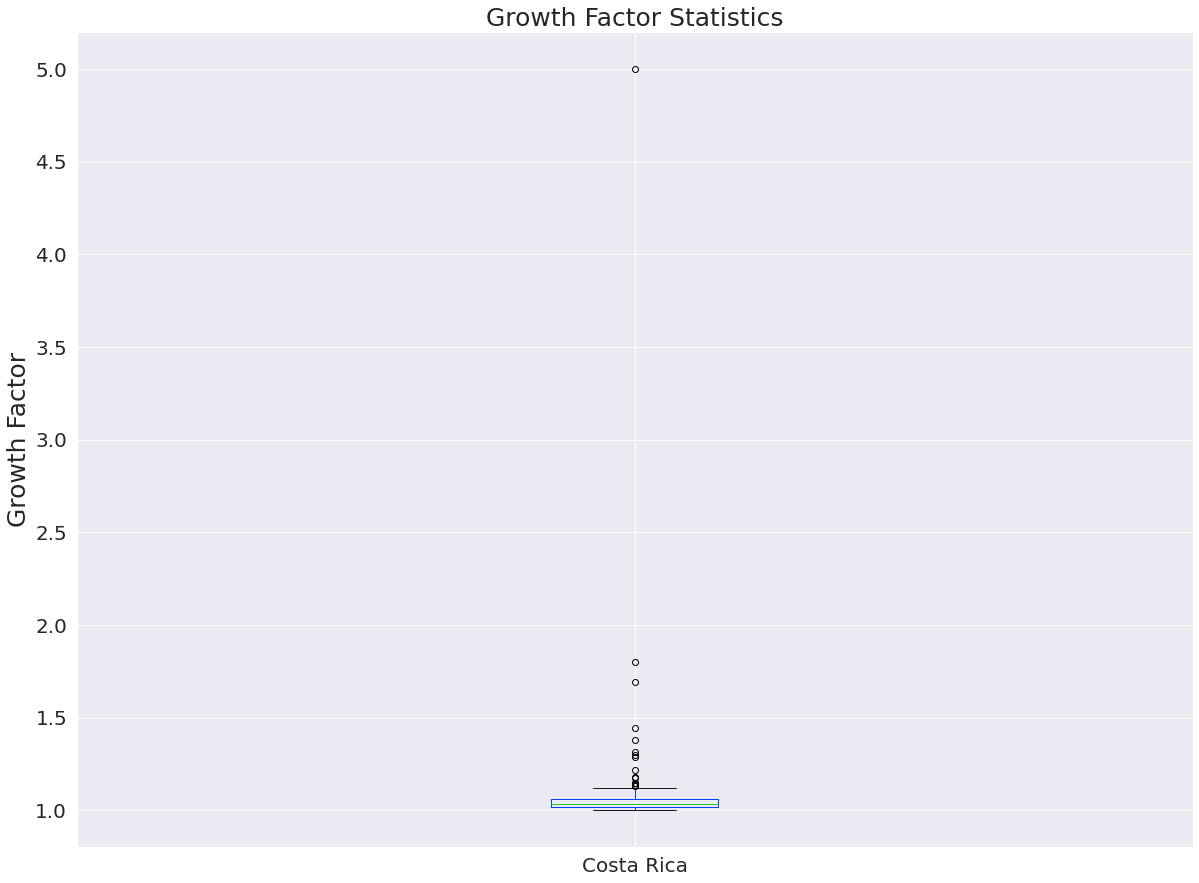

In [23]:
growth_no_null['Costa Rica'].plot(kind='box', fontsize=20)
plt.title('Growth Factor Statistics', fontsize=25)
plt.ylabel('Growth Factor', fontsize= 25)
plt.show()